## Capstone Project - 

### Build a model to accurately predict whether the patients in the dataset have diabetes or not

In [1]:
# To perform various tasks, we have to import some important python libraries
# Numpy is for Numerical Python, Pandas for handling large data sets / Dataframe 
import pandas as pd
import numpy as np

# To avoid unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from jupyterthemes import jtplot
jtplot.style(theme='monokai')

# import libraries for model validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# import libraries for metrics and reporting
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


## Dataset description:


### Variables with Description
Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0


In [2]:
# Read the csv file
diabetes = pd.read_csv("D:/Software/DATA SCIENCE/All Courses/Capstone Projects/Data-Science-Capstone-Projects-master/Project 2/Healthcare - Diabetes/health_care_diabetes.csv")

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
# Performing descriptive analysis
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Here we can see that some columns like 'Glucose','BloodPressure','SkinThickness','Insulin','BMI' has zero values which is very much impractical so, they are treated as missing values.

### So, we will replace those zero values of each column with the mean of this column individually. By that all values looks like normal now.

In [6]:
# Replacing 0 value of specific columns with their column mean
diabetes['Glucose'] = diabetes['Glucose'].replace(0,diabetes['Glucose'].mean())
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0,diabetes['BloodPressure'].mean())
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].mean())
diabetes['Insulin'] = diabetes['Insulin'].replace(0,diabetes['Insulin'].mean())
diabetes['BMI'] = diabetes['BMI'].replace(0,diabetes['BMI'].mean())

In [7]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


In [8]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### So, all the zero values are replaced by their column mean.


## Visually exploring the variables and looking for the distribution of these variables using histograms. Treating the missing values accordingly.


In [9]:
col = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
col

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

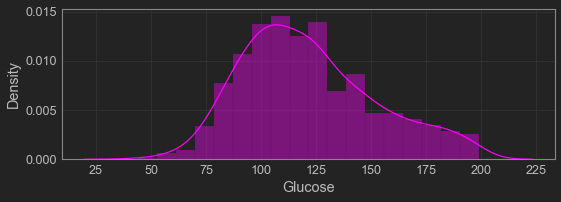

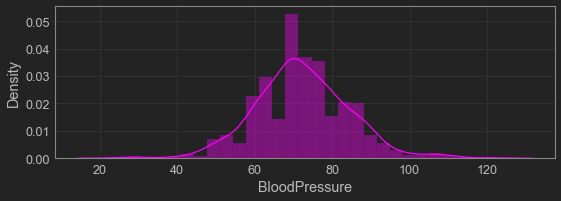

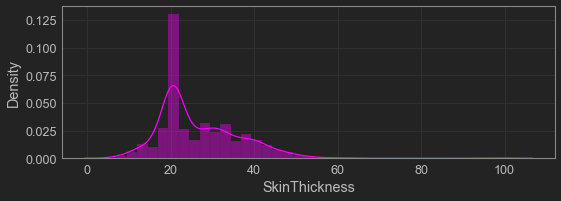

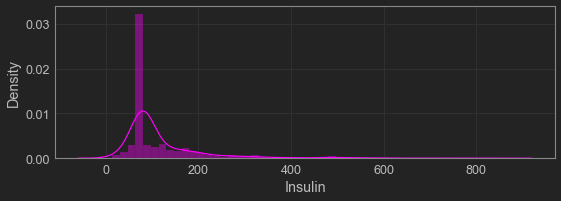

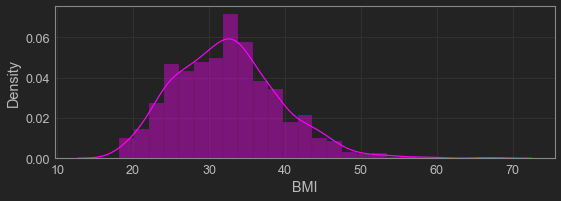

In [10]:
for i in range(0,len(col)):
        plt.figure(figsize=(8,3))
        sns.distplot(diabetes[col[i]], kde=True,color = 'fuchsia')
        plt.tight_layout()
        plt.show()
       

In [11]:
diabetes['SkinThickness'].skew()


1.2266699605994507

In [12]:
diabetes['Insulin'].skew()


3.2918250253401626

In [13]:
diabetes['BMI'].skew()

0.6011031773105592

### From the above histograms and skewness Values it can be easily seen that the distribution of 'SkinThickness','Insulin' & 'BMI' columns , is Right-Skewed. A right-skewed distribution is longer on the right side of its peak than on its left.

### So we have to treat the skewness of dataset. There are several methods like Log transformation,Square Root Transform,Box-Cox Transform etc. Here we are using the Log Transformation to remove skewness of dataset.

In [14]:
SkinThickness_log = np.log(diabetes['SkinThickness'])
SkinThickness_log.skew()

-0.039975536891733436

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

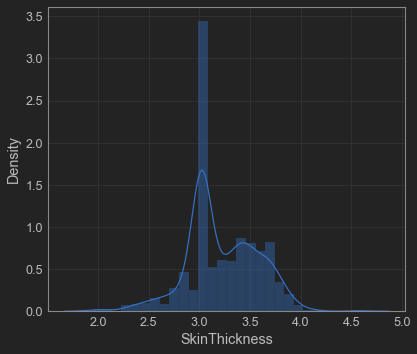

In [15]:
sns.distplot(SkinThickness_log)

In [16]:
Insulin_log = np.log(diabetes['Insulin'])
Insulin_log.skew()

0.8474205674933389

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

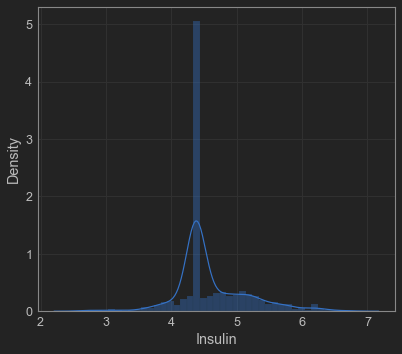

In [17]:
sns.distplot(Insulin_log)

In [18]:
BMI_log = np.log(diabetes['BMI'])
BMI_log.skew()

-0.05416113327854022

<AxesSubplot:xlabel='BMI', ylabel='Density'>

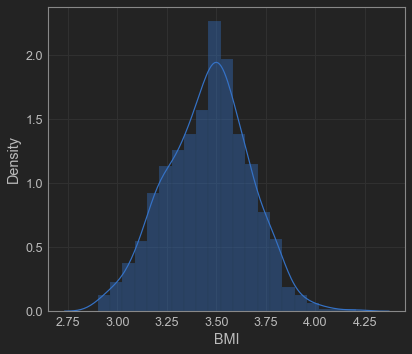

In [19]:
sns.distplot(BMI_log)

### So we can see that after log transformation the data is now at nearly Normal distribution .


### We will add those new columns in our dataset which were created after Log Transformation / Skewness traetment

In [20]:
diabetes['SkinThickness_log']= SkinThickness_log
diabetes['Insulin_log']= Insulin_log
diabetes['BMI_log']= BMI_log

In [21]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_log,Insulin_log,BMI_log
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,3.555348,4.379517,3.514526
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,3.367296,4.379517,3.280911
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,3.022202,4.379517,3.148453
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,3.135494,4.543295,3.335770
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,3.555348,5.123964,3.763523


### Checking for Missing Values & Outliers

In [22]:
diabetes.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_log,Insulin_log,BMI_log
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False,False,False,False


#### So, There are no missing Value in the Dataset

### Checking for Outliers by Boxplot Visualization

In [23]:
col_log = ['Glucose','BloodPressure','SkinThickness_log','Insulin_log','BMI_log']
col_log

['Glucose', 'BloodPressure', 'SkinThickness_log', 'Insulin_log', 'BMI_log']

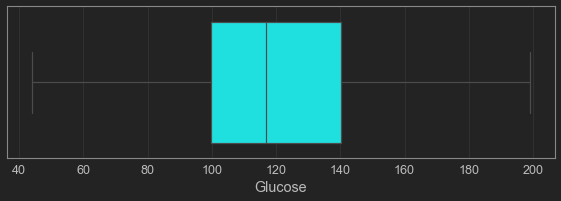

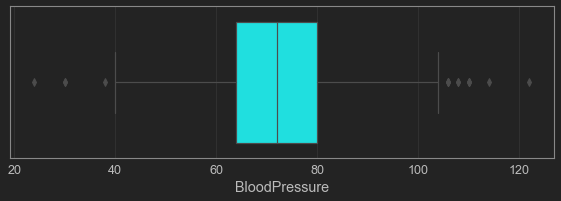

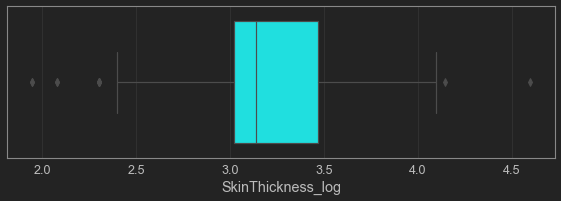

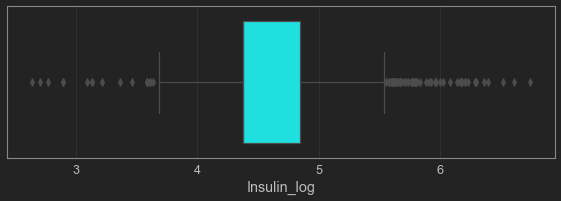

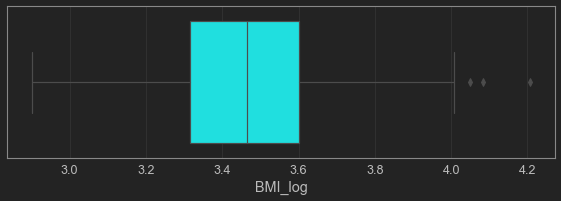

In [24]:
for i in range(0,len(col_log)):
        plt.figure(figsize=(8,3))
        sns.boxplot(diabetes[col_log[i]],color = 'cyan')
        plt.tight_layout()
        plt.show()
       

### From above observation it can be seen that almost every column has outliers so we have to treat them.
### We will treat outliers by Interquartile Range Technique / IQR Method

In [25]:
# IQR (Interquartile range ) technique for outlier treatment
def outlier_treatment(col_log):
    sorted(col_log)
    Q1,Q3 = np.percentile(col_log , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

### Outlier Treatment of column BloodPressure

In [26]:
# Show the Range of outliers for column BloodPressure
lower_range,upper_range = outlier_treatment(diabetes['BloodPressure'])
print("Lower Range:",lower_range)
print("Upper Range:",upper_range)

Lower Range: 40.0
Upper Range: 104.0


<AxesSubplot:xlabel='BloodPressure'>

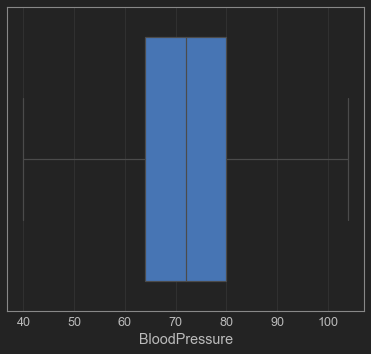

In [27]:
# Treatment with IQR
lower_index = list(diabetes[ diabetes['BloodPressure'] < lower_range ].index)

upper_index = list(diabetes[ diabetes['BloodPressure'] > upper_range ].index)

total_index = list(lower_index + upper_index)
diabetes.drop(total_index, inplace = True)
sns.boxplot(x=diabetes['BloodPressure'])

#### So, we can see that all outliers are removed from this column

### Outlier Treatment of column SkinThickness_log

In [28]:
# Show the Range of outliers for column SkinThickness_log
lower_range,upper_range = outlier_treatment(diabetes['SkinThickness_log'])
print("Lower Range:",lower_range)
print("Upper Range:",upper_range)

Lower Range: 2.3569005504250247
Upper Range: 4.131037114224547


<AxesSubplot:xlabel='SkinThickness_log'>

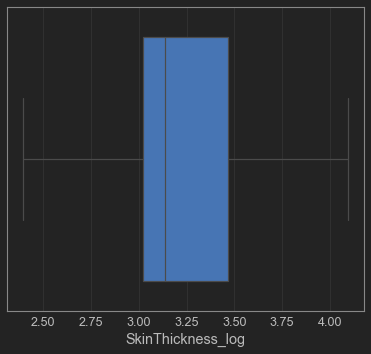

In [29]:
# Treatment with IQR
lower_index = list(diabetes[ diabetes['SkinThickness_log'] < lower_range ].index)

upper_index = list(diabetes[ diabetes['SkinThickness_log'] > upper_range ].index)

total_index = list(lower_index + upper_index)
diabetes.drop(total_index, inplace = True)
sns.boxplot(x=diabetes['SkinThickness_log'])

#### So, we can see that all outliers are removed from this column

### Outlier Treatment of column Insulin_log

In [30]:
# Show the Range of outliers for column Insulin_log
lower_range,upper_range = outlier_treatment(diabetes['Insulin_log'])
print("Lower Range:",lower_range)
print("Upper Range:",upper_range)

Lower Range: 3.688440699194856
Upper Range: 5.531310775211143


<AxesSubplot:xlabel='Insulin_log'>

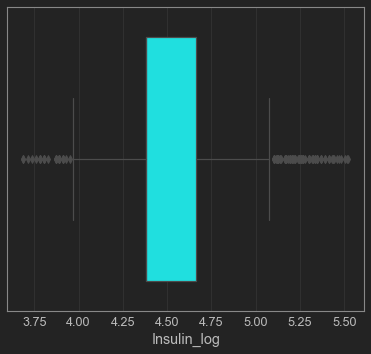

In [31]:
# Treatment with IQR
lower_index = list(diabetes[ diabetes['Insulin_log'] < lower_range ].index)

upper_index = list(diabetes[ diabetes['Insulin_log'] > upper_range ].index)

total_index = list(lower_index + upper_index)
diabetes.drop(total_index, inplace = True)
sns.boxplot(x=diabetes['Insulin_log'],color = 'cyan')

#### So, we can see that all outliers are removed from this column but there are showing more. 
#### As the number of data around the outlier region is more so we are taking this column as it is showing now.

### Outlier Treatment of column BMI_log

In [32]:
# Show the Range of outliers for column BMI_log
lower_range,upper_range = outlier_treatment(diabetes['BMI_log'])
print("Lower Range:",lower_range)
print("Upper Range:",upper_range)

Lower Range: 2.900038903219875
Upper Range: 3.994716530350941


<AxesSubplot:xlabel='BMI_log'>

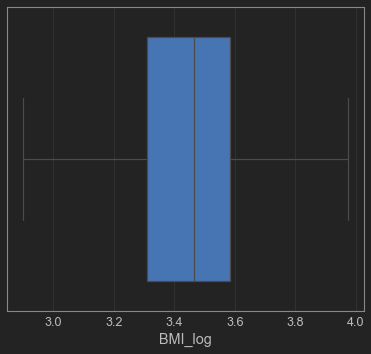

In [33]:
# Treatment with IQR
lower_index = list(diabetes[ diabetes['BMI_log'] < lower_range ].index)

upper_index = list(diabetes[ diabetes['BMI_log'] > upper_range ].index)

total_index = list(lower_index + upper_index)
diabetes.drop(total_index, inplace = True)
sns.boxplot(x=diabetes['BMI_log'])

#### So, we can see that all outliers are removed from this column

### Create a count (frequency) plot describing the data types and the count of variables. 

In [34]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               675 non-null    int64  
 1   Glucose                   675 non-null    float64
 2   BloodPressure             675 non-null    float64
 3   SkinThickness             675 non-null    float64
 4   Insulin                   675 non-null    float64
 5   BMI                       675 non-null    float64
 6   DiabetesPedigreeFunction  675 non-null    float64
 7   Age                       675 non-null    int64  
 8   Outcome                   675 non-null    int64  
 9   SkinThickness_log         675 non-null    float64
 10  Insulin_log               675 non-null    float64
 11  BMI_log                   675 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 68.6 KB


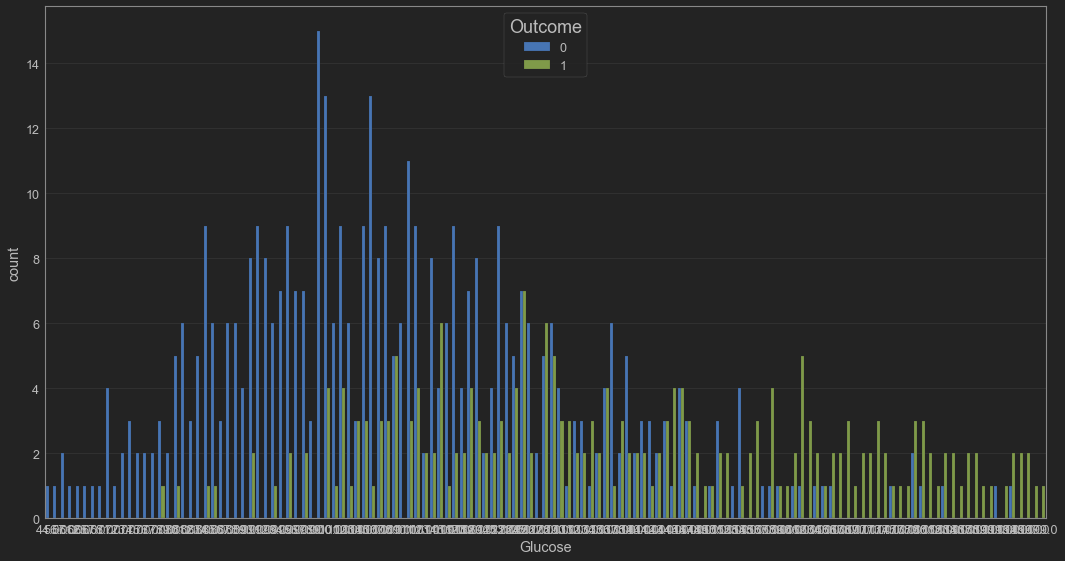

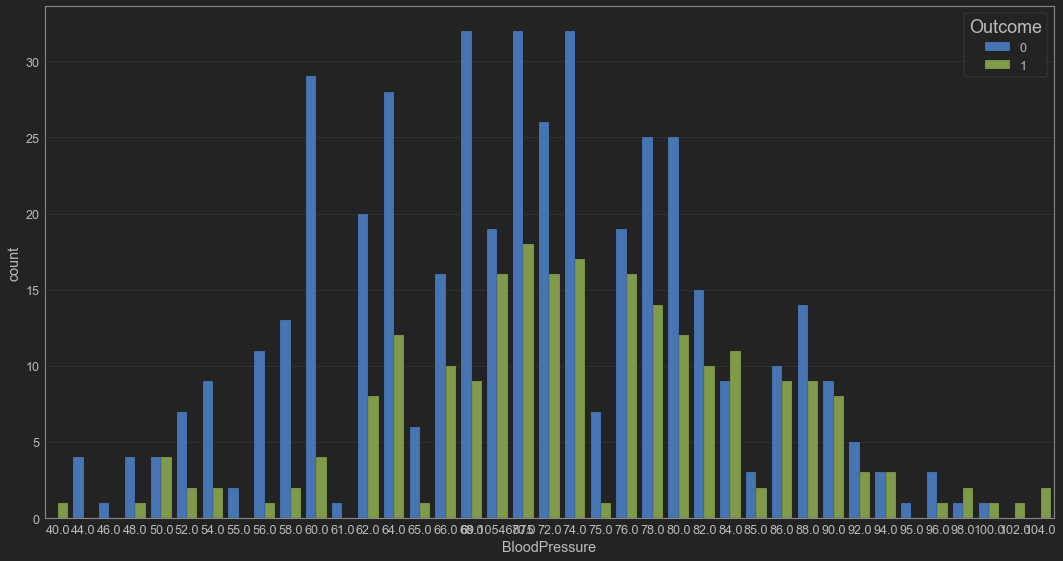

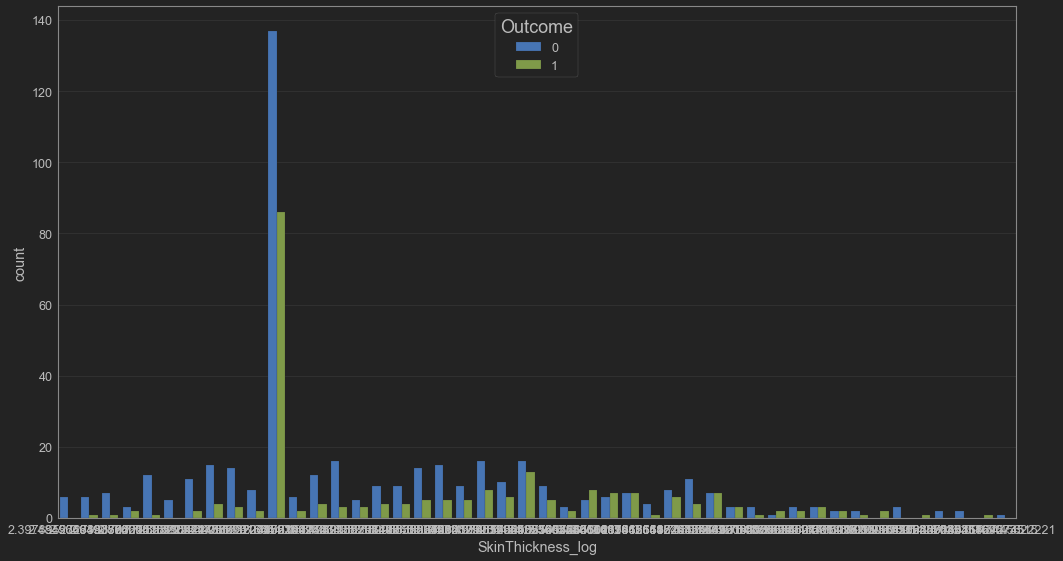

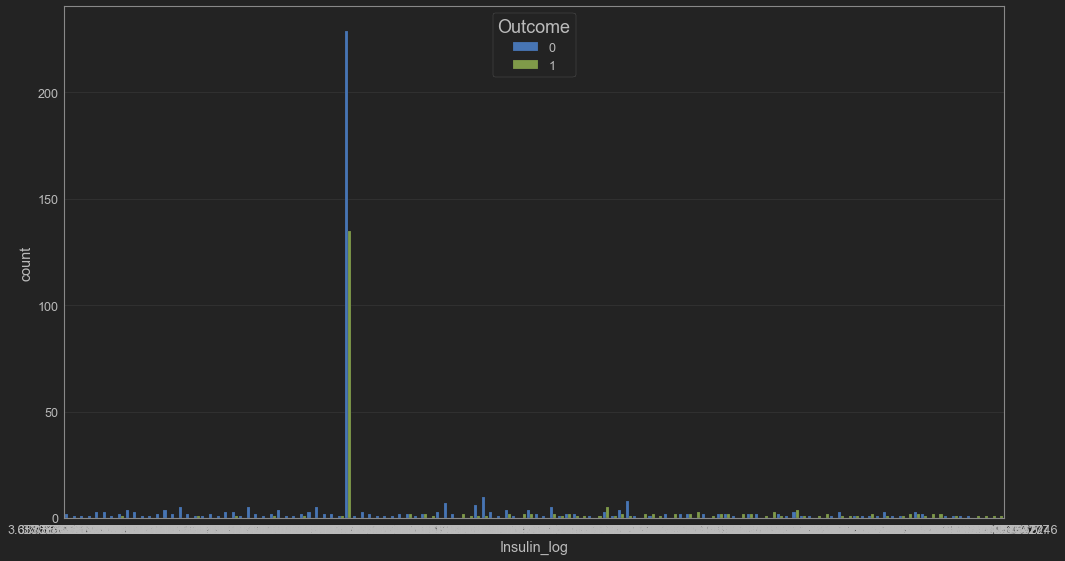

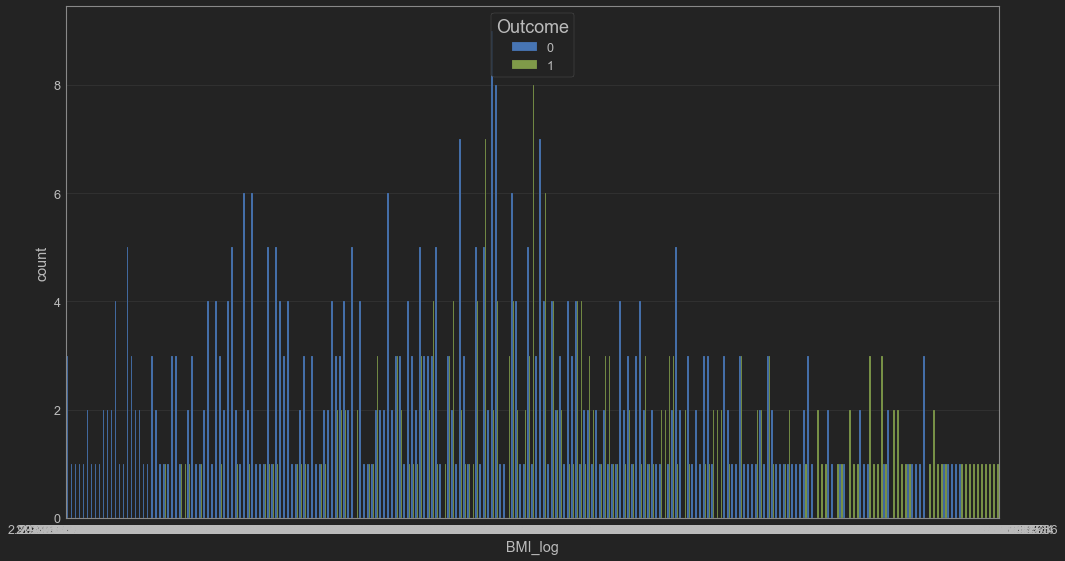

In [35]:
for i in range(0,len(col_log)):
        plt.figure(figsize=(15,8))
        sns.countplot(diabetes[col_log[i]],hue= diabetes['Outcome'])
        plt.tight_layout()
        plt.show()
       

<AxesSubplot:xlabel='Age', ylabel='count'>

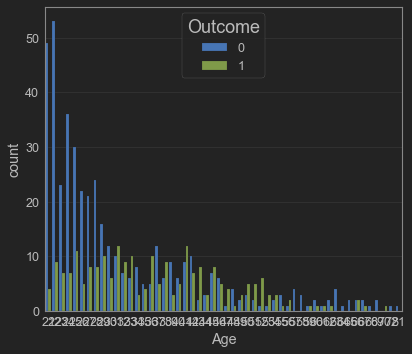

In [36]:
sns.countplot(diabetes['Age'],hue = diabetes['Outcome'])

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

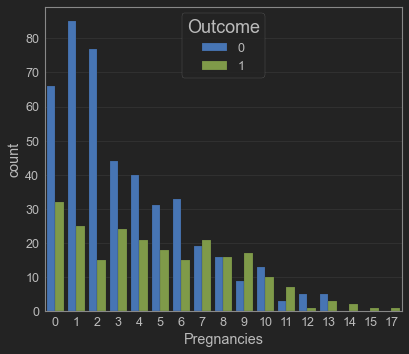

In [37]:
sns.countplot(diabetes['Pregnancies'],hue = diabetes['Outcome'])

### Dropping unnecessary columns

In [38]:
diabetes = diabetes.drop('SkinThickness',axis=1)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_log,Insulin_log,BMI_log
0,6,148.0,72.0,79.799479,33.6,0.627,50,1,3.555348,4.379517,3.514526
1,1,85.0,66.0,79.799479,26.6,0.351,31,0,3.367296,4.379517,3.280911
2,8,183.0,64.0,79.799479,23.3,0.672,32,1,3.022202,4.379517,3.148453
3,1,89.0,66.0,94.000000,28.1,0.167,21,0,3.135494,4.543295,3.335770
4,0,137.0,40.0,168.000000,43.1,2.288,33,1,3.555348,5.123964,3.763523


In [39]:
diabetes = diabetes.drop('Insulin',axis=1)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_log,Insulin_log,BMI_log
0,6,148.0,72.0,33.6,0.627,50,1,3.555348,4.379517,3.514526
1,1,85.0,66.0,26.6,0.351,31,0,3.367296,4.379517,3.280911
2,8,183.0,64.0,23.3,0.672,32,1,3.022202,4.379517,3.148453
3,1,89.0,66.0,28.1,0.167,21,0,3.135494,4.543295,3.335770
4,0,137.0,40.0,43.1,2.288,33,1,3.555348,5.123964,3.763523


In [40]:
diabetes = diabetes.drop('BMI',axis=1)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_log,Insulin_log,BMI_log
0,6,148.0,72.0,0.627,50,1,3.555348,4.379517,3.514526
1,1,85.0,66.0,0.351,31,0,3.367296,4.379517,3.280911
2,8,183.0,64.0,0.672,32,1,3.022202,4.379517,3.148453
3,1,89.0,66.0,0.167,21,0,3.135494,4.543295,3.335770
4,0,137.0,40.0,2.288,33,1,3.555348,5.123964,3.763523


## Create scatter charts between the pair of variables to understand the relationships 

<AxesSubplot:xlabel='Insulin_log', ylabel='Age'>

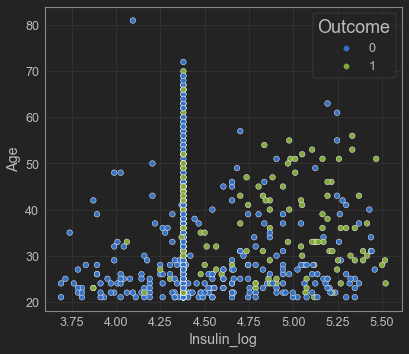

In [41]:
sns.scatterplot(data=diabetes, x="Insulin_log", y="Age", hue="Outcome", size=None ,legend='auto')

### We can observe from the above scatter plot that with increasing Insulin Level and at Old ages , the chances of diabetes increases.

<AxesSubplot:xlabel='Insulin_log', ylabel='Glucose'>

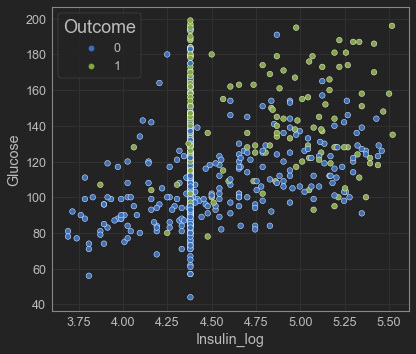

In [42]:
sns.scatterplot(data=diabetes, x="Insulin_log", y="Glucose", hue="Outcome", size=None ,legend='auto')

### From above observation it is clear that at low Glucose and Insulin level, mostly no chances of Diabetes but chances increases with increase in Glucose level.

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

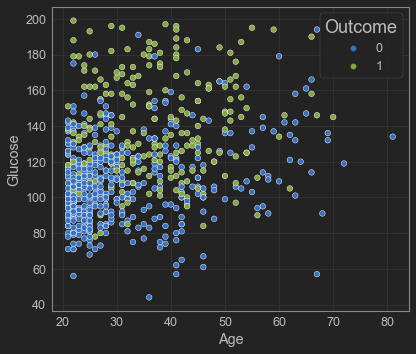

In [43]:
sns.scatterplot(data=diabetes, x="Age", y="Glucose", hue="Outcome", size=None ,legend='auto')

### From above observation, we can see that Mostly Diabetes depends on high Glucose level and its not depended on age.

<AxesSubplot:xlabel='BMI_log', ylabel='Age'>

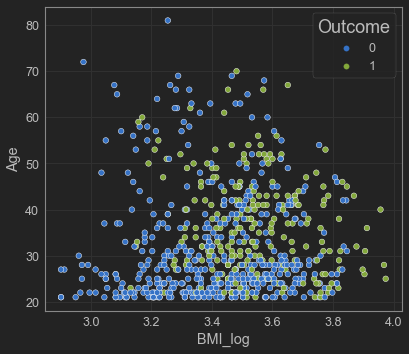

In [44]:
sns.scatterplot(data=diabetes, x="BMI_log", y="Age", hue="Outcome", size=None ,legend='auto')

### From above observation, we can see that at low age when BMI rate is high then there are possibilities of Diabetes. Again at higher age and low BMI cn also be reason of Diabetes.

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

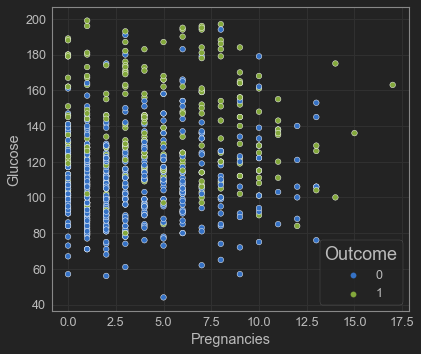

In [45]:
sns.scatterplot(data=diabetes, x="Pregnancies", y="Glucose", hue="Outcome", size=None ,legend='auto')

### We can observe from the above scatter plot that with increasing pregnency count and Glucose level , the chances of diabetes also increases.

<AxesSubplot:xlabel='SkinThickness_log', ylabel='BMI_log'>

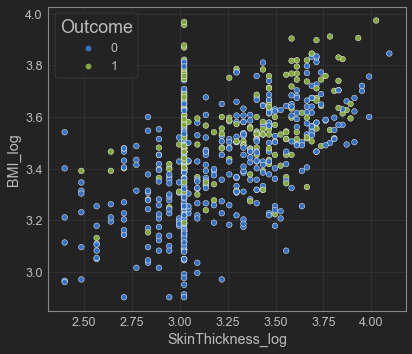

In [46]:
sns.scatterplot(data=diabetes, x="SkinThickness_log", y="BMI_log", hue="Outcome", size=None ,legend='auto')

### We can observe from the above scatter plot that with increasing SkinThickness and Body mass index  , the chances of diabetes also increases.

<AxesSubplot:xlabel='BMI_log', ylabel='Pregnancies'>

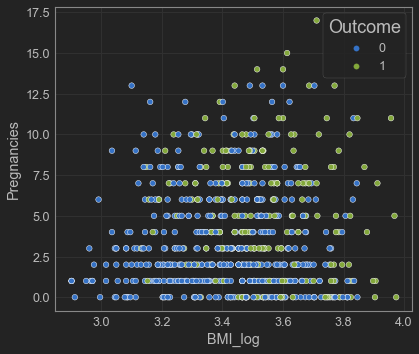

In [47]:
sns.scatterplot(data=diabetes, x="BMI_log", y="Pregnancies", hue="Outcome", size=None ,legend='auto')

### From above it is observed that Diabetes mostly depends on Increase in BMI rate. As Diabetes mostly happend in 2 to 10 times pregnency.

<AxesSubplot:xlabel='BMI_log', ylabel='BloodPressure'>

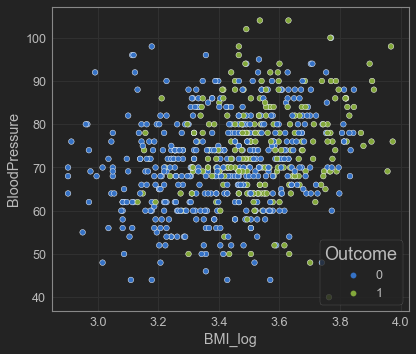

In [48]:
sns.scatterplot(data=diabetes, x="BMI_log", y="BloodPressure", hue="Outcome", size=None ,legend='auto')

### We can observe from the above scatter plot that with increasing Blood Pressure and Body mass index  , the chances of diabetes also increases.

## Perform correlation analysis. Visually explore it using a heat map.

In [49]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_log,Insulin_log,BMI_log
Pregnancies,1.000000,0.136702,0.184355,-0.027796,0.532082,0.203269,0.044440,-0.007649,0.048655
Glucose,0.136702,1.000000,0.228825,0.091435,0.265987,0.486498,0.051997,0.305481,0.190577
BloodPressure,0.184355,0.228825,1.000000,0.013489,0.329750,0.167421,0.104663,0.011338,0.259868
DiabetesPedigreeFunction,-0.027796,0.091435,0.013489,1.000000,0.051748,0.191953,0.131788,0.160598,0.151537
Age,0.532082,0.265987,0.329750,0.051748,1.000000,0.212785,0.006727,0.027065,0.033773
Outcome,0.203269,0.486498,0.167421,0.191953,0.212785,1.000000,0.135510,0.201968,0.315691
SkinThickness_log,0.044440,0.051997,0.104663,0.131788,0.006727,0.135510,1.000000,0.286909,0.525336
Insulin_log,-0.007649,0.305481,0.011338,0.160598,0.027065,0.201968,0.286909,1.000000,0.206667
BMI_log,0.048655,0.190577,0.259868,0.151537,0.033773,0.315691,0.525336,0.206667,1.000000


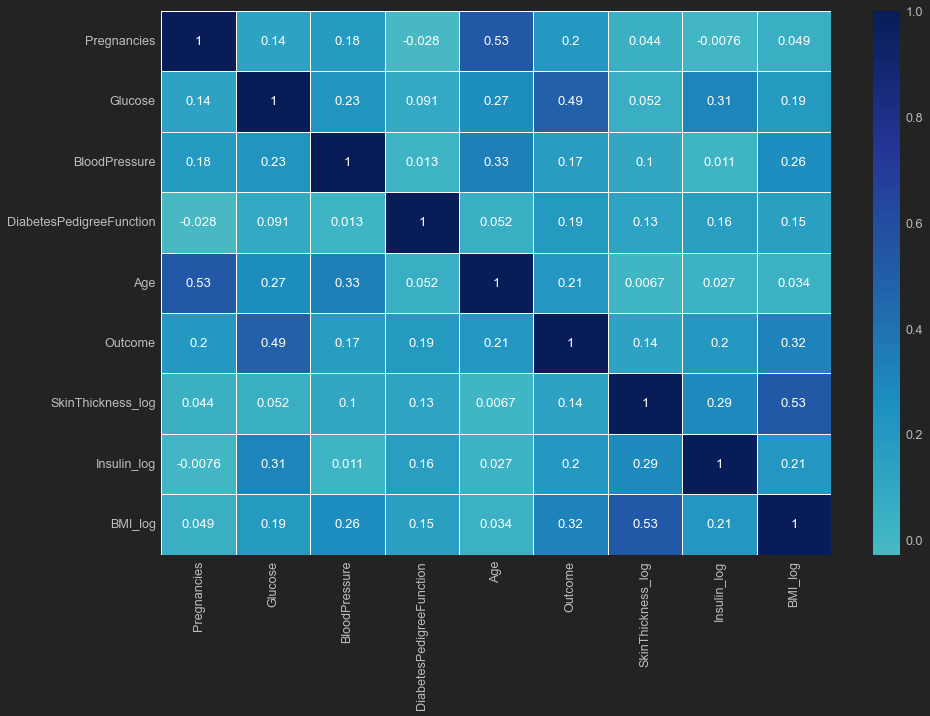

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(diabetes.corr(),annot=True,linewidths=.5,center=0,cbar=True,cmap="YlGnBu")
plt.show()

## Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

In [51]:
# Lets divide the dataset in train and test data for model training and testing
x = diabetes.drop(['Outcome'], axis=1)
y = diabetes[['Outcome']]


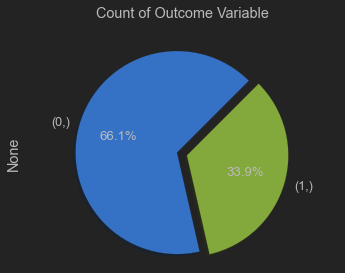

In [52]:
# y.value_counts().plot.pie(autopct ='%.2f')
colors = ['#5ba85f','#c360aa']  # '#7f67ca','#5ba85f','#c360aa'
y.value_counts().plot(kind='pie',autopct='%2.1f%%',
                explode = (0.10, 0), startangle=45, shadow=True, figsize = (5,4)) # explode will mark the highest
plt.axis('equal')
plt.title('Count of Outcome Variable\n')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

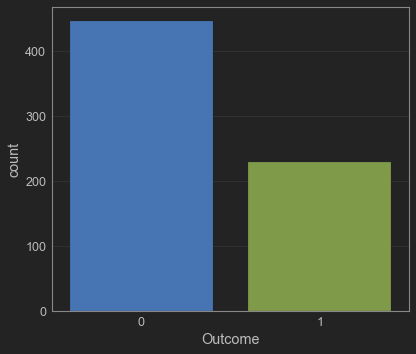

In [53]:
sns.countplot(diabetes['Outcome'])

In [54]:
 diabetes['Outcome'].value_counts()

0    446
1    229
Name: Outcome, dtype: int64

### So we can see that the value of 1/positive is nearly half of value 0/negetive result.
### So the dataset is Imbalanced.

### Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce errors.

### However, if the data set is imbalance then In such cases, we get a pretty high accuracy just by predicting the majority class, but we fail to capture the minority class, which is most often the point of creating the model in the first place.

### One of the widely adopted class imbalance techniques for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

#### The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting.

#### In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

### There are many other techniques and python libraries like imbalance-learn, which help in tackling Imbalanced data set.

### Here we are going to use Oversampling as the data is very low in quantity. Random undersampling can resulted in missing important data. 



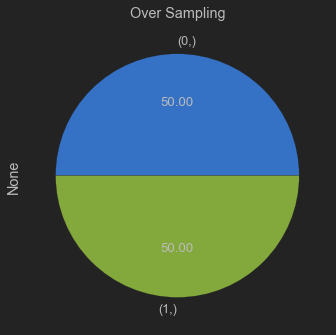

In [55]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority')
x_res,y_res = ros.fit_resample(x,y)

ax = y_res.value_counts().plot.pie(autopct ='%.2f')
_ = ax.set_title('Over Sampling')

### Now we can see that the Dataset is Balanced.

In [56]:
# Splitting Resampled dataset in train and test data
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.30, random_state=1)

In [57]:
# Checking the shape
print('shape of xtrain :', x_train.shape)
print('shape of ytrain :', y_train.shape)
print('shape of xtest :', x_test.shape)
print('shape of ytest :', y_test.shape)

shape of xtrain : (624, 8)
shape of ytrain : (624, 1)
shape of xtest : (268, 8)
shape of ytest : (268, 1)


In [58]:
x_train

,Pregnancies,Glucose,BloodPressure,DiabetesPedigreeFunction,Age,SkinThickness_log,Insulin_log,BMI_log
92,1,126.000000,56.000000,0.801,21,3.367296,5.023881,3.356897
114,8,84.000000,74.000000,0.457,39,3.433987,4.379517,3.645450
875,1,128.000000,88.000000,1.057,37,3.663562,4.700480,3.597312
76,1,107.000000,68.000000,0.165,24,2.944439,4.379517,3.277145
877,1,122.000000,64.000000,0.692,30,3.465736,5.049856,3.558201
...,...,...,...,...,...,...,...,...
715,6,120.894531,68.000000,0.727,41,3.713572,4.379517,3.663562
767,4,183.000000,69.105469,0.212,36,3.022202,4.379517,3.346389
72,2,110.000000,74.000000,0.698,27,3.367296,4.828314,3.478158
235,1,71.000000,78.000000,0.422,21,3.912023,3.806662,3.502550


In [59]:
y_train

,Outcome
92,0
114,0
875,1
76,0
877,1
...,...
715,1
767,1
72,0
235,0


In [60]:
# There seems to be a case of large number & small numbers - scaling / Normalization may need to be done

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

scaler = StandardScaler()
scaler.fit(diabetes)
print(scaler.mean_)
scaled_diab = pd.DataFrame(scaler.transform(diabetes),columns = diabetes.columns)
scaled_diab

[  3.88296296 119.43344907  72.10176505   0.46169926  33.28296296
   0.33925926   3.21305421   4.524153     3.44896852]


,Pregnancies,Glucose,BloodPressure,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_log,Insulin_log,BMI_log
0,0.631428,0.992163,-0.009382,0.527489,1.436804,1.395564,1.057482,-0.409933,0.322119
1,-0.859873,-1.195930,-0.562518,-0.353251,-0.196217,-0.716556,0.476514,-0.409933,-0.825754
2,1.227948,2.207770,-0.746897,0.671088,-0.110269,1.395564,-0.589619,-0.409933,-1.476589
3,-0.859873,-1.057003,-0.562518,-0.940411,-1.055702,-0.716556,-0.239614,0.054252,-0.556206
4,-1.158133,0.610115,-2.959441,5.827882,-0.024320,1.395564,1.057482,1.700009,1.545571
...,...,...,...,...,...,...,...,...,...
670,1.824469,-0.640224,0.359376,-0.927646,2.554135,-0.716556,2.033277,1.895551,0.218672
671,-0.561613,0.089141,-0.193760,-0.388353,-0.540011,-0.716556,0.255749,-0.409933,0.769111
672,0.333168,0.054409,-0.009382,-0.691506,-0.282166,-0.716556,-0.239614,0.550823,-0.900202
673,-0.859873,0.228067,-1.115654,-0.359633,1.178959,1.395564,-0.589619,-0.409933,-0.218373


<AxesSubplot:>

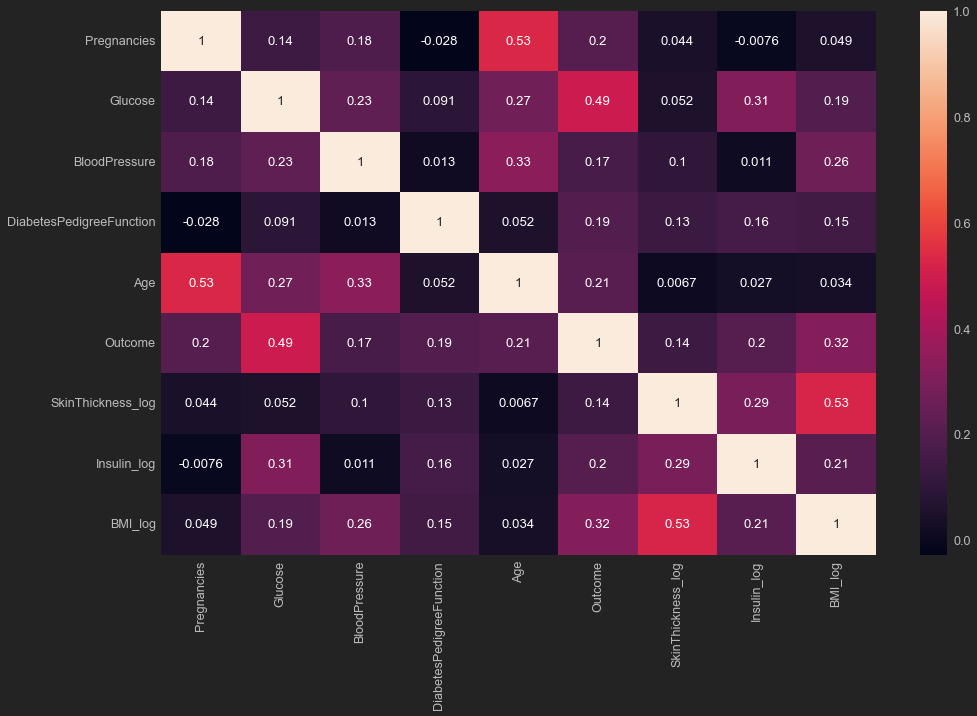

In [61]:
# Corelation analysis with Scaled data
plt.figure(figsize=(16, 10))
sns.heatmap(scaled_diab.corr(), annot=True)

In [62]:
# scale the train and test data differently to prevent data leaking

x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

In [63]:
# Calculate the p-value of logistic regression from statsmodel for feature selection
# Logistic regression pvalue is used to test the null hypothesis and its coefficient is equal to zero. 
#The lowest pvalue is <0.05 and this lowest value indicates that you can reject the null hypothesis which is good for model.

from scipy.stats import norm
def logit_pvalue(model, x_test_scaled):
   
    p = model.predict_proba(x)
    n1 = len(p)
    m1 = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    answ = np.zeros((m1, m1))
    for i in range(n1):
        answ = answ + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(answ))
    se = np.sqrt(np.diag(vcov))
    t1 =  coefs/se  
    p = (1 - norm.cdf(abs(t1))) * 2
    return p



#print(logit_pvalue(model, x_train_scaled))

import statsmodels.api as sd
sd_model = sd.Logit(y_train, sd.add_constant(x_train_scaled)).fit(disp=0)
print(sd_model.pvalues)
sd_model.summary()

const    3.797001e-01
x1       7.649465e-05
x2       1.620116e-19
x3       8.894454e-01
x4       5.628704e-03
x5       4.888855e-01
x6       9.551308e-01
x7       1.716329e-01
x8       3.291356e-08
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  624
Model:                          Logit   Df Residuals:                      615
Method:                           MLE   Df Model:                            8
Date:                Wed, 28 Dec 2022   Pseudo R-squ.:                  0.3007
Time:                        21:52:12   Log-Likelihood:                -302.14
converged:                       True   LL-Null:                       -432.06
Covariance Type:            nonrobust   LLR p-value:                 1.401e-51
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0888      0.101     -0.878      0.380      -0.287       0.109
x1             0.4849      0.123      3.955      0.000       0.245       0.725
x2             1.1919      0.132      9.036      0.000       0.933       1.450
x3            -0.0152      0.110     -0.139      0.889      -0.230       0.200
x4             0.2998      0.108      2.769      0.006       0.088       0.512
x5             0.0806      0.116      0.692      0.489      -0.148       0.309
x6            -0.0070      0.124     -0.056      0.955      -0.250       0.236
x7             0.1517      0.111      1.367      0.172      -0.066       0.369
x8             0.7536      0.136      5.525      0.000       0.486       1.021
==============================================================================
"""

### So, from above observation we can see that p-value is less than 0.05 so we can reject the null-hypothesis.

### Here we are going to build Logistic Regression Model and a Random Forest model. As we know that Ensemble techniques like Decision Trees are more capable with dealing un-balanced dataset.

### Then we will compare the 2 models accuracy with KNN Classification model.

### Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

### Here we will use K-fold Cross validation because our dataset is imbalanced. If accuracy is used to measure the goodness of a model, a model which classifies all testing samples into “0” will have an excellent accuracy , but obviously, this model won’t provide any valuable information for us. So we will test randomly with K-fold and see the accuracy of the model.


## Creating a LogisticRegression model to predict Heart_attack  

In [64]:
# Fit/Train the model with scaled data

model1 = LogisticRegression()
model1.fit(x_train_scaled, y_train)

# Predicting result from the model 
y_predict = model1.predict(x_test_scaled)
train_model_score = model1.score(x_train_scaled, y_train)
test_model_score = model1.score(x_test_scaled, y_test)
print("LogisticRegression Model Efficiency Percentage in training data = ",train_model_score.mean()*100)
print("LogisticRegression Model Efficiency Percentage in testing data = ",test_model_score.mean()*100)

LogisticRegression Model Efficiency Percentage in training data =  75.0
LogisticRegression Model Efficiency Percentage in testing data =  76.86567164179104


### Cross Validation with KFold

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import KFold

# Cross Validation with K-fold
kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
results = model_selection.cross_val_score(model1, x, y, cv=kfold)
print("Cross validation score of LogisticRegression Model with K-fold : " ,results.mean()*100)

Cross validation score of LogisticRegression Model with K-fold :  75.5531167690957


In [66]:
#Print the Intercept and Co-efficients of the model

print("The value of intercept for Logistic Regression Model is := \n",model1.intercept_)
print("The values of co-eficient for Logistic Regression Model are:= \n",model1.coef_)

The value of intercept for Logistic Regression Model is := 
 [-0.08947025]
The values of co-eficient for Logistic Regression Model are:= 
 [[ 0.47378655  1.16984086 -0.01058597  0.29501349  0.08445227 -0.00196441
   0.1529191   0.7377178 ]]


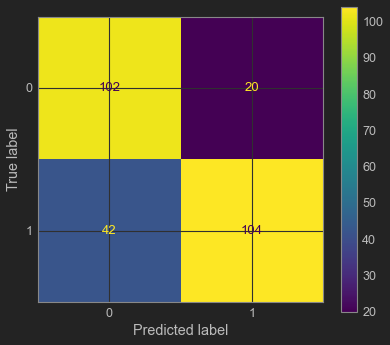

In [67]:
# calculate Confusion Matrix
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Analyzing the confusion matrix

True Positives (TP):  The model correctly predicted about  Diabetes for 104 person

True Negatives (TN):  The model correctly predicted about NO Diabetes for 102 person

False Positives (FP): The model incorrectly predicted that people do have Diabetes (a "Type I error") for 20 person

False Negatives (FN): The model incorrectly predicted that people don't have Diabetes (a "Type II error") for 42 person

### To assess how well a logistic regression model fits a dataset, we can look at the following two metrics:

Sensitivity: The probability that the model predicts a positive outcome for an observation when indeed the outcome is positive. This is also called the “true positive rate.”

Specificity: The probability that the model predicts a negative outcome for an observation when indeed the outcome is negative. This is also called the “true negative rate.”

#### One way to visualize these two metrics is by creating a ROC curve, which stands for “receiver operating characteristic” curve.

    This is a plot that displays the sensitivity along the y-axis and (1 – specificity) along the x-axis.

#### One way to quantify how well the logistic regression model does at classifying data is to calculate AUC, which stands for “area under curve.”

    The closer the AUC is to 1, the better the model.


Score of Area under Curve / AUC Score for the model is:=  77.41971704468898




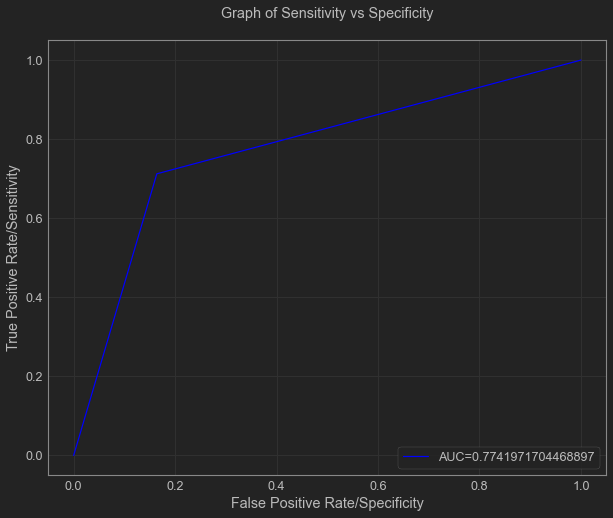

In [68]:
#calculate ROC and AUC of LR model
fpr, tpr, _ = metrics.roc_curve(y_test,  y_predict)
auc = metrics.roc_auc_score(y_test, y_predict)

#print AUC score
print("\nScore of Area under Curve / AUC Score for the model is:= ",auc*100)
print("\n")

#create ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label="AUC="+str(auc),color="blue")
plt.ylabel('True Positive Rate/Sensitivity')
plt.xlabel('False Positive Rate/Specificity')
plt.title("Graph of Sensitivity vs Specificity\n")
plt.legend(loc=4)
plt.show()

### As we know that the closer the AUC is to 1, the better the model. Here AUC is around 76-77% for the model so we can interprete the model, is good to predict Diabetes.

### The more that the ROC curve hugs the top left corner of the plot, the better the model does at predicting the chances of Heart-attack .So here we can say that the model is good in predictions.

In [69]:
## Calculating the Standard-errors for logistic regression / Cross Validation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

print("mean_absolute_error value for this model is = ",mean_absolute_error(y_test, y_predict))
print("mean_squared_error value for this model is = ",mean_squared_error(y_test, y_predict))
print("mean_squared_log_error value for this model is = ",mean_squared_log_error(y_test, y_predict))

mean_absolute_error value for this model is =  0.23134328358208955
mean_squared_error value for this model is =  0.23134328358208955
mean_squared_log_error value for this model is =  0.11114957784674809



### @@@ Creating a model to predict Diabetes with Random Forest Classifier

#### Random Forest : Its an ensemble technique where only Decision Trees are used as models & here Randomness can be introduced (by bootstraping or creating random data from original for Bagging) in each DTree model.

In [70]:
# Hyper-parameter tuning by GridSearchCV to get the best hyper-parametrs for RandomForestClassifier

from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


clf = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(x_train_scaled, y_train)

clf.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [71]:
# Here we will use the hyper-parametrs found from above
rfcl = RandomForestClassifier(bootstrap=True,max_depth= 30,max_features='auto',min_samples_leaf= 1,n_estimators=100)
rfcl = rfcl.fit(x_train_scaled, y_train)
pred_RF = rfcl.predict(x_test_scaled)
acc_RF = accuracy_score(y_test, pred_RF)
print("Random Forest Model Efficiency Percentage is = ",acc_RF.mean()*100)

Random Forest Model Efficiency Percentage is =  76.11940298507463


### So,the Random Forest Model will predict heart-attack with 76% accuracy.


### @@@ Creating a model to predict Diabetes with K Nearest Neighbour / KNN Classifier

#### KNN : It classifies the data point on how its neighbor is classified. KNN classifies the new data points based on the similarity measure of the earlier stored data points.

In [72]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
KNN_Model = classifier.fit(x_train_scaled, y_train)
pred_KNN = KNN_Model.predict(x_test_scaled)
acc_KNN = accuracy_score(y_test, pred_KNN)
print("KNN Model Efficiency Percentage is = ",acc_KNN.mean()*100)

KNN Model Efficiency Percentage is =  75.0


### So,the K Nearest Neighbour Model will predict heart-attack with 75% accuracy.

## Comparison of Model efficiencies with Classification Report

In [73]:
# It will give summary of all scores for LR model efficiency
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       122
           1       0.84      0.71      0.77       146

    accuracy                           0.77       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.77      0.77       268



In [74]:
print("Percentage of Model precision : ",precision_score(y_test,y_predict).mean()*100) 
print("Recall Score of the model : ",recall_score(y_test,y_predict).mean()*100)
print("f1 Score of the model : ",f1_score(y_test,y_predict).mean()*100)

Percentage of Model precision :  83.87096774193549
Recall Score of the model :  71.23287671232876
f1 Score of the model :  77.03703703703705


In [75]:
# It will give summary of all scores for RF model efficiency
print(classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       122
           1       0.84      0.69      0.76       146

    accuracy                           0.76       268
   macro avg       0.77      0.77      0.76       268
weighted avg       0.78      0.76      0.76       268



In [76]:
print("Percentage of Model precision : ",precision_score(y_test,pred_RF).mean()*100) 
print("Recall Score of the model : ",recall_score(y_test,pred_RF).mean()*100)
print("f1 Score of the model : ",f1_score(y_test,pred_RF).mean()*100)

Percentage of Model precision :  84.16666666666667
Recall Score of the model :  69.17808219178082
f1 Score of the model :  75.93984962406014


In [77]:
# It will give summary of all scores for RF model efficiency
print(classification_report(y_test, pred_KNN))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       122
           1       0.79      0.73      0.76       146

    accuracy                           0.75       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.75      0.75      0.75       268



In [78]:
print("Percentage of Model precision : ",precision_score(y_test,pred_KNN).mean()*100) 
print("Recall Score of the model : ",recall_score(y_test,pred_KNN).mean()*100)
print("f1 Score of the model : ",f1_score(y_test,pred_KNN).mean()*100)

Percentage of Model precision :  79.25925925925927
Recall Score of the model :  73.28767123287672
f1 Score of the model :  76.15658362989323


In [79]:
### Comparing Accuracy Scores of Various used models

print("LogisticRegression Model Efficiency Percentage in training data = ",train_model_score.mean()*100)
print("LogisticRegression Model Efficiency Percentage in testing data = ",test_model_score.mean()*100)
print("Random Forest Model Efficiency Percentage is = ",acc_RF.mean()*100)
print("K Nearest Neighbour Model Efficiency Percentage is = ",acc_KNN.mean()*100)

LogisticRegression Model Efficiency Percentage in training data =  75.0
LogisticRegression Model Efficiency Percentage in testing data =  76.86567164179104
Random Forest Model Efficiency Percentage is =  76.11940298507463
K Nearest Neighbour Model Efficiency Percentage is =  75.0


### So, We can consider that the most efficient model is the Random Forest Model with efficiency of around 77%.
### When we observe the f1 score and Recall Score of every model, we can see that its nearly 75% that means the model will predict 75% times the True Positive. Which is very good but can be better.It is due to unbalanced dataset which we saw before.

In [80]:
### Let's Save the Modified Dataset of Diabetes for Visualization through a Dashboard created in Tableau Public
# diabetes.to_excel("D:/Software/DATA SCIENCE/All Courses/Capstone Projects/Data-Science-Capstone-Projects-master/Project 2/Healthcare - Diabetes/diabetes.xlsx")